# Classificação por vizinhos mais próximos

Para está seção serão utilizados os conceitos a respeito de classificação pela técnica dos k vizinhos mais próximos.

## Estendendo o estudo de caso da base https://www.kaggle.com/rakeshrau/social-network-ads

Faça uma extensão das análises realizadas como dataset utilizado em sala de aula. Para este estudo de caso, realize os seguintes itens:
* Importe a base de dados com o código de integração com o kaggle apresentado em sala de aula.
* Faça o particionamento do dataset com $80\%$ dos dados para treinamento e $20\%$ dos dados para teste;
* Faça uma avaliação do impacto de diferentes valores de k (número de vizinhos) para os resultados da classificação. Experimente $k = [3, 5, 7, 9, 11]$.
* Exiba as regiões de decisão de cada um dos classificadores;
* Exiba as métricas de desempenho já apresentadas em sala de aula para cada um dos classificadores: acurácia e a matriz de confusão de forma gráfica.

**Responda com base nos experimentos apresentados: qual o impacto que o valor de $k$ tem no desempenho do algoritmo? Há diferenças significativas no desempenho do algoritmo, para esse dataset, na medida em que o valor de $k$ varia?**

In [12]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [14]:
!kaggle datasets download -d rakeshrau/social-network-ads

  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 2.26MB/s]


In [15]:
!ls -a

.  ..  .config	sample_data  Social_Network_Ads.csv  social-network-ads.zip


In [16]:
!unzip social-network-ads.zip

Archive:  social-network-ads.zip
replace Social_Network_Ads.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Social_Network_Ads.csv  


In [17]:
!ls

sample_data  Social_Network_Ads.csv  social-network-ads.zip


In [18]:
import pandas as pd
import numpy as np

sna = pd.read_csv("Social_Network_Ads.csv")
sna.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
x = sna.iloc[:, [2,3]].values
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [20]:
y = sna.iloc[:,4].values
y[:5]

array([0, 0, 0, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2,random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(320, 80, 320, 80)

In [22]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

x_train[:5]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763]])

N# neighbors: 3
Acurácia: 0.9
N# neighbors: 5
Acurácia: 0.925
N# neighbors: 7
Acurácia: 0.925
N# neighbors: 9
Acurácia: 0.9375
N# neighbors: 11
Acurácia: 0.925


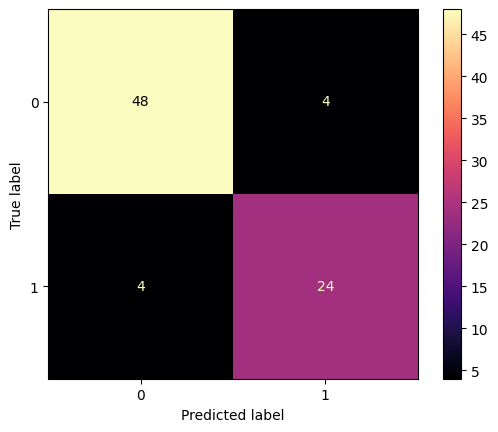

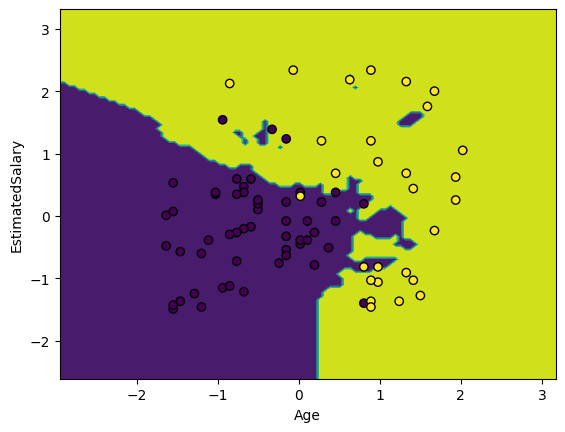

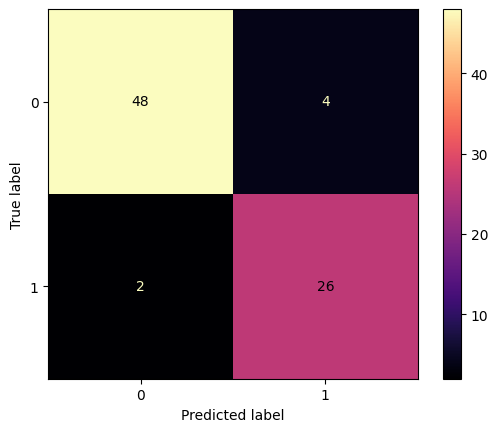

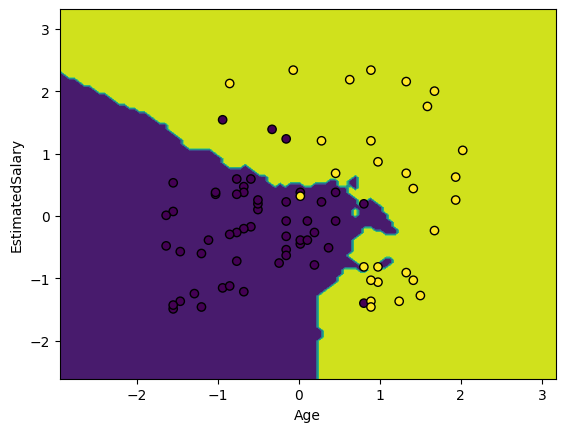

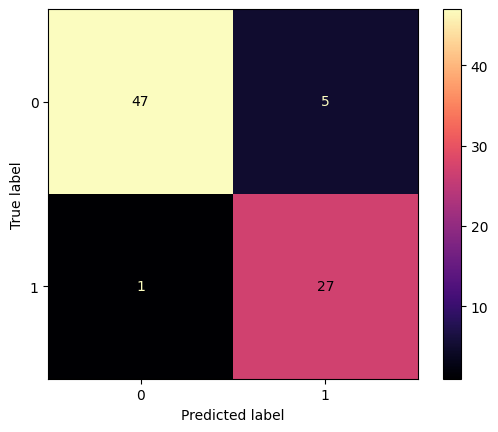

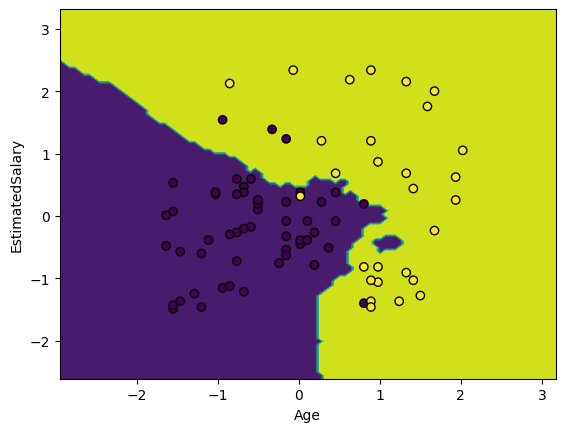

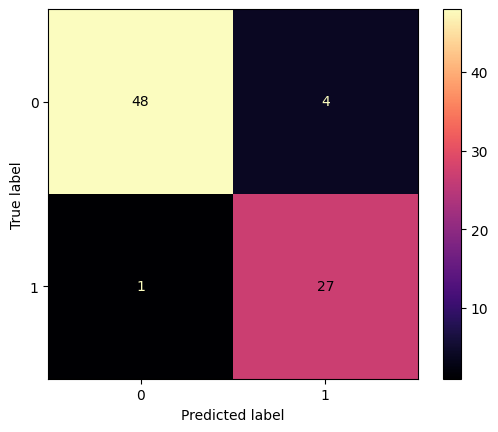

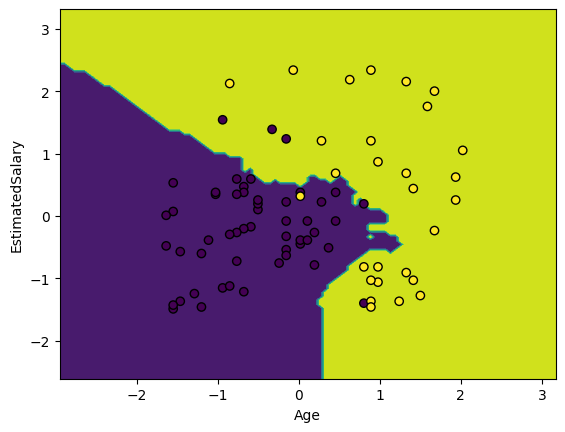

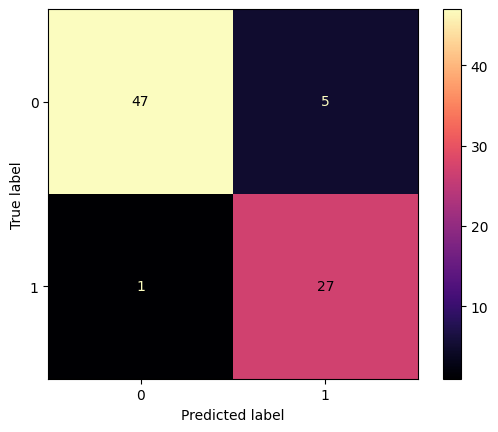

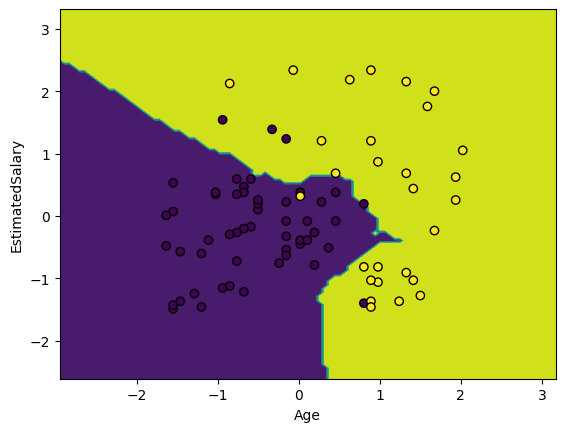

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

k_values = [3,5,7,9,11]
colors = sns.color_palette("magma",as_cmap=True)

for value in k_values:
  classifier = KNeighborsClassifier(n_neighbors=value)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  mc = confusion_matrix(y_test, y_pred)
  print("N# neighbors:",value)
  disp = ConfusionMatrixDisplay(confusion_matrix=mc)
  disp.plot(cmap=colors)
  disp = DecisionBoundaryDisplay.from_estimator(classifier,x_train,
                                              response_method="predict",
                                              xlabel='Age',
                                              ylabel='EstimatedSalary')
  disp.ax_.scatter(x_test[:, 0],x_test[:, 1],c=y_test,edgecolor="k")
  print("Acurácia:",accuracy_score(y_test,y_pred))

O valor de K não impacta significamente os resultados do treinamento a partir de K=5. O único valor de K que mostra um valor muito diferente dos outros é 3, provavelmente porque o número de vizinhos não é suficiente para se adaptar aos dados de teste e fazer as predições mais corretamente.

## Aplicando o kNN em outro dataset

O sklearn tem um submódulo com algumas bases de dados. Crie um código para realizar a classificação dos tipos de plantas da iris dataset. Analise alguns valores diferentes para o número de vizinhos mais próximos. Apresente os resultados a respeito do melhor algoritmo kNN treinado para esse dataset.

**Obs. Particione o dataset, selecionando $80\%$ dos dados para treinamento e $20\%$ dos dados para teste**.

**Dica: para importar o dataset iris a partir do sklearn, utilize o código abaixo**

`from sklearn import datasets`

`iris = datasets.load_iris()`

In [24]:
from sklearn import datasets

iris = datasets.load_iris()

In [25]:
x = iris.data[:, [0,2]]
y = iris.target

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(120, 30, 120, 30)

N# neighbors: 3
Acurácia: 0.9666666666666667
N# neighbors: 5
Acurácia: 0.9666666666666667
N# neighbors: 7
Acurácia: 0.9666666666666667
N# neighbors: 9
Acurácia: 1.0
N# neighbors: 11
Acurácia: 1.0


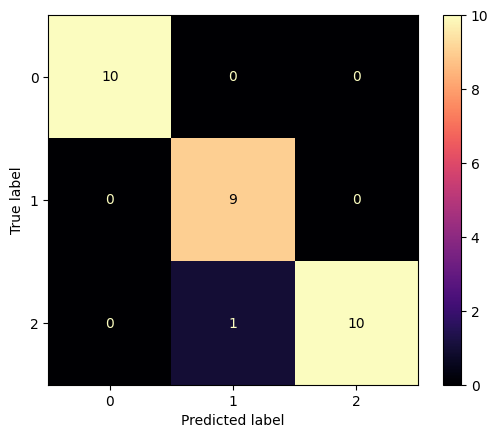

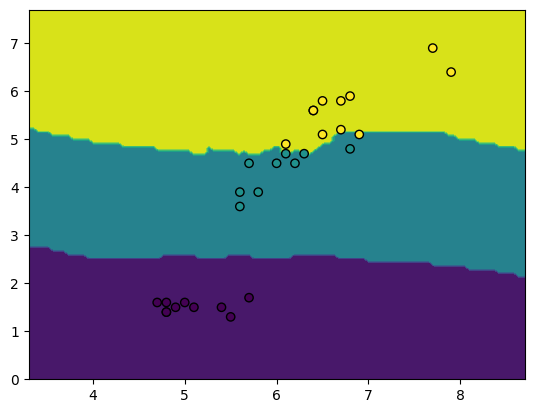

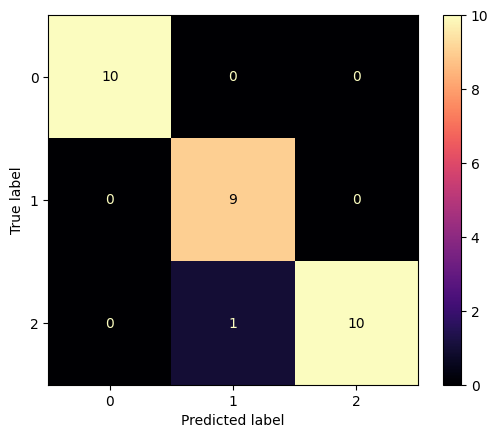

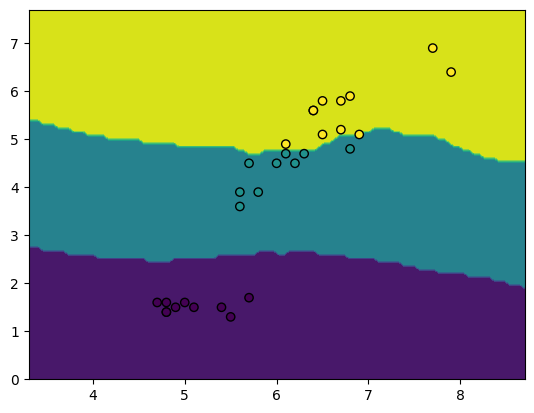

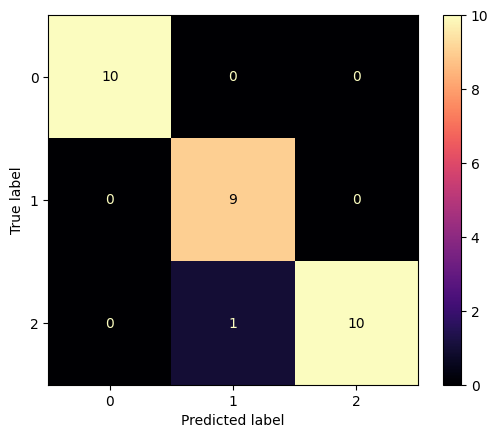

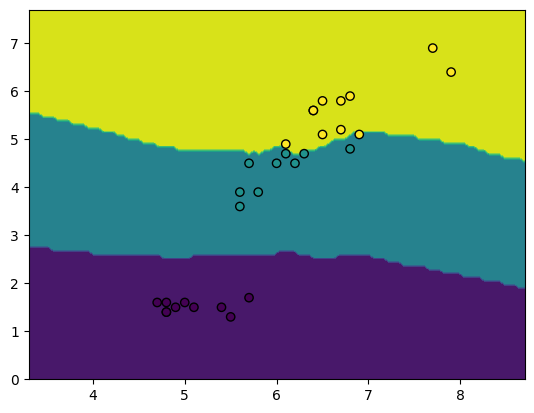

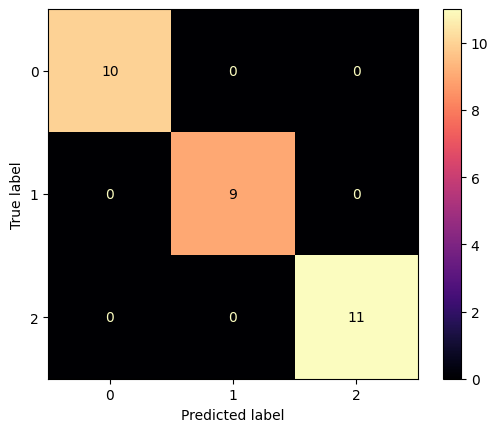

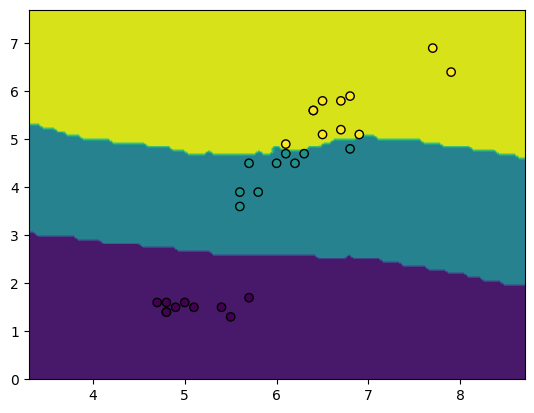

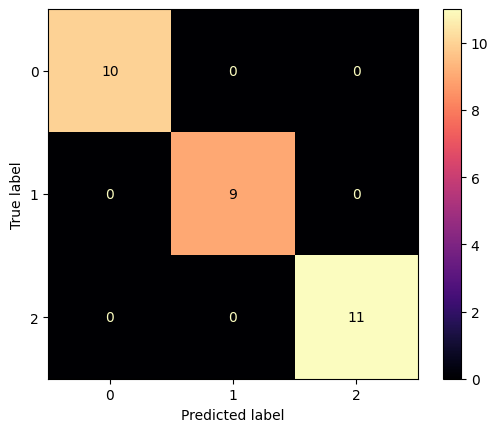

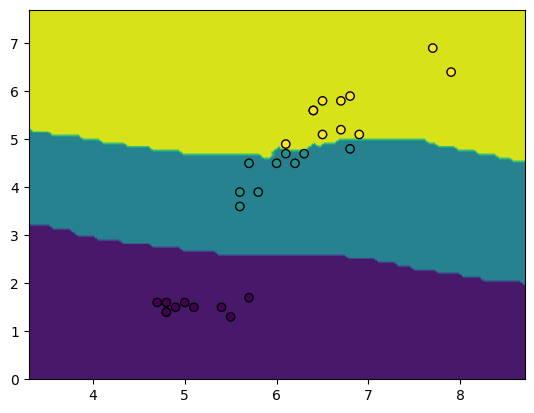

In [29]:
for value in k_values:
  classifier = KNeighborsClassifier(n_neighbors=value)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  mc = confusion_matrix(y_test, y_pred)
  print("N# neighbors:",value)
  print("Acurácia:",accuracy_score(y_test,y_pred))
  disp = ConfusionMatrixDisplay(confusion_matrix=mc)
  disp.plot(cmap=colors)
  disp = DecisionBoundaryDisplay.from_estimator(classifier,x_train,
                                                response_method="predict")
  disp.ax_.scatter(x_test[:, 0],x_test[:, 1],c=y_test,edgecolor="k")

# Prevendo valores com regressão polinomial

Durante as aulas foram apresentados os conceitos a respeito da regressão linear. Essas ideias foram generalizadas com a ideia da regressão polinomial (que trata-se basicamente de uma regressão linear em um conjunto expandido de features, obtidas por expansão polinomial).

## Analisando o desempenho de regressão no dataset diabetes

Utilize o dataset diabetes, incluído no módulo datasets do scikit-learn. Pedem-se as seguintes análises:
* Aplique diferentes modelos de regressão linear/polinomial no dataset de diabetes. Teste a regressão com os seguintes graus: $1, 2, 3, 4, 5$.
* Utilize a feature da coluna número $2$ do dataset para tentar prever os valores de $y$ (assim como o exemplo apresentado em sala de aula);
* Particione o dataset utilizando $90\%$ dos dados para treinamento e $10\%$ dos dados para teste;
* Avalie o desempenho da capacidade de aproximação das diferentes regressões usando o score $R^2$ das regressões nos dados de treinamento e nos dados de teste;
* Faça o plot das predições do modelo tanto com relação aos dados de treinamento quanto com relação aos dados de teste.

In [30]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_x.shape, diabetes_y.shape)

(442, 10) (442,)


In [31]:
subset_diabetes_x = diabetes_x[:, None, 2]
subset_diabetes_x.shape

(442, 1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(subset_diabetes_x,
                                                    diabetes_y,test_size=0.1,
                                                    random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(397, 45, 397, 45)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(397, 1) (45, 1) (397,) (45,)


## Grau 1

In [34]:
real_regressor = linear_model.LinearRegression()
real_regressor.fit(x_train,y_train)

diabetes_y_pred = real_regressor.predict(x_test)
print("Coeficient:",real_regressor.coef_,"\n",
      "Bias:",real_regressor.intercept_)

mse = mean_squared_error(y_test,diabetes_y_pred)
print("MSE %.2f" % mse)

r2 = r2_score(y_test,diabetes_y_pred)
print("Determination coeficient - r^2 %.2f" % r2)

Coeficient: [955.62706895] 
 Bias: 152.09801011063846
MSE 3835.44
Determination coeficient - r^2 0.37


### Dados de teste

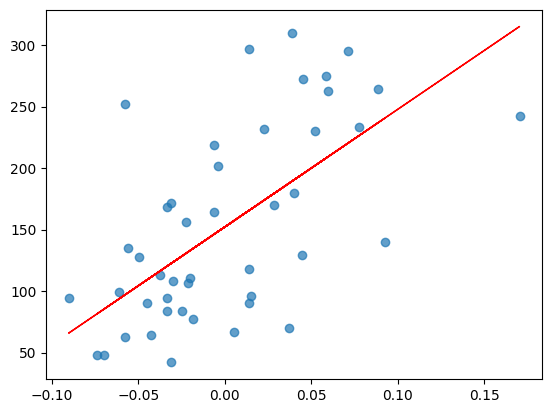

In [37]:
plt.scatter(x_test,y_test,alpha=0.7)
plt.plot(x_test,diabetes_y_pred,color="red",linewidth=1)

In [47]:
min_x = subset_diabetes_x.min()
max_x = subset_diabetes_x.max()
min_x, max_x

(-0.09027529589850945, 0.17055522598064407)

In [48]:
x_intervalo = np.linspace(min_x, max_x, 100)
x_intervalo = x_intervalo.reshape(-1, 1)

In [49]:
y_intervalo = real_regressor.predict(x_intervalo)

### Dados de treino

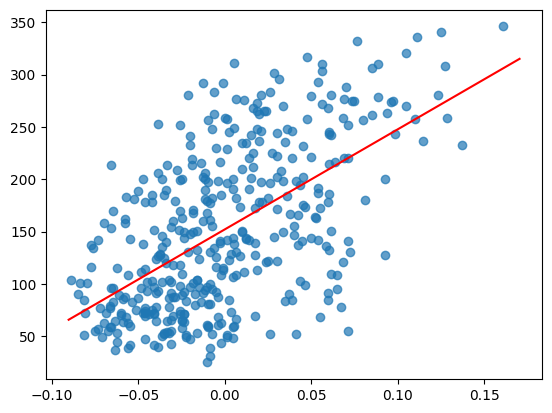

In [71]:
plt.scatter(x_train,y_train,alpha=0.7)
plt.plot(x_intervalo, y_intervalo, color='red')

## Polinomial

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Grau 2

### Dados de teste

Score: 0.3062350948393878


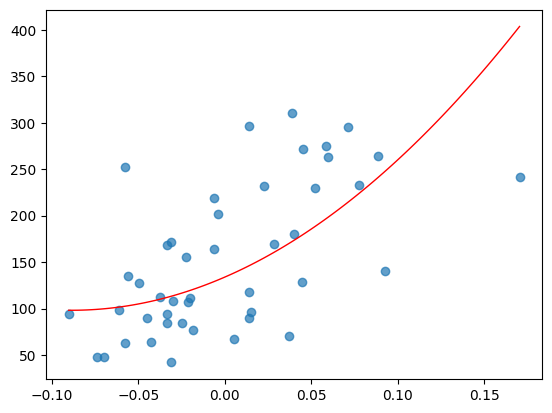

In [63]:
degree = 2
pol_regressor = make_pipeline(PolynomialFeatures(degree),
                              LinearRegression())
pol_regressor.fit(subset_diabetes_x[:100],diabetes_y[:100])
print("Score:",pol_regressor.score(subset_diabetes_x,diabetes_y))
min_x = subset_diabetes_x.min()
max_x = subset_diabetes_x.max()
x_range = np.linspace(min_x,max_x,100)
x_range = x_range.reshape(-1,1)
y_range = pol_regressor.predict(x_range)
plt.scatter(x_test,y_test,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

### Dados de treino

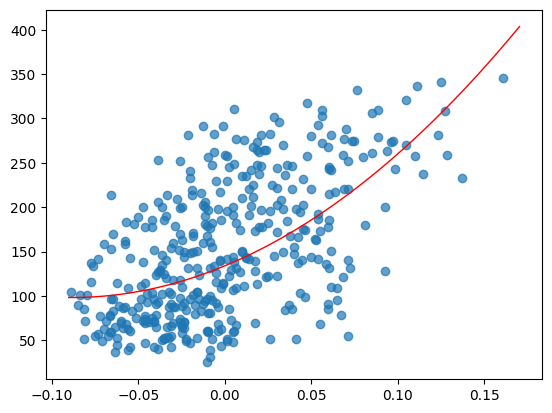

In [64]:
plt.scatter(x_train,y_train,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

## Grau 3

### Dados de teste

Score: 0.2808699588681488


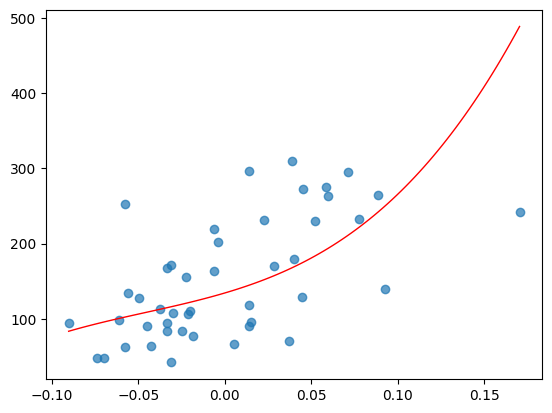

In [65]:
degree = 3
pol_regressor = make_pipeline(PolynomialFeatures(degree),
                              LinearRegression())
pol_regressor.fit(subset_diabetes_x[:100],diabetes_y[:100])
print("Score:",pol_regressor.score(subset_diabetes_x,diabetes_y))
min_x = subset_diabetes_x.min()
max_x = subset_diabetes_x.max()
x_range = np.linspace(min_x,max_x,100)
x_range = x_range.reshape(-1,1)
y_range = pol_regressor.predict(x_range)
plt.scatter(x_test,y_test,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

### Dados de treino

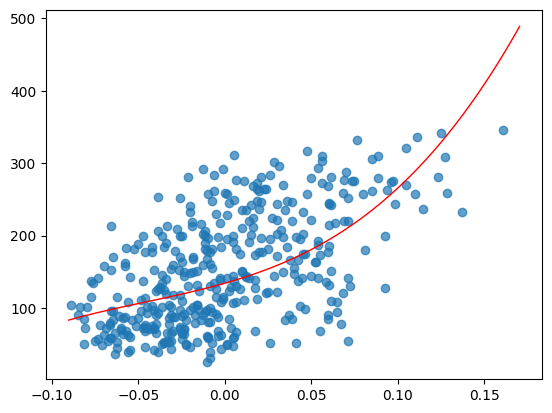

In [66]:
plt.scatter(x_train,y_train,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

## Grau 4

### Dados de teste

Score: 0.20141614332458957


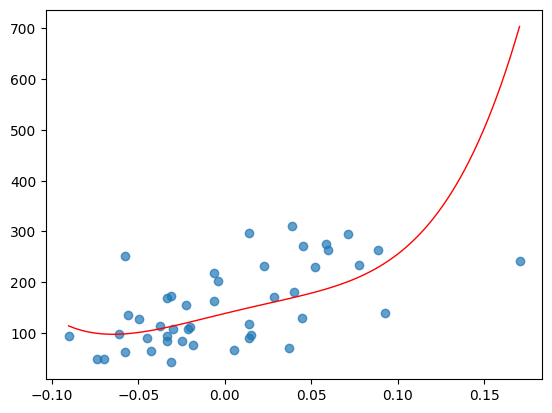

In [67]:
degree = 4
pol_regressor = make_pipeline(PolynomialFeatures(degree),
                              LinearRegression())
pol_regressor.fit(subset_diabetes_x[:100],diabetes_y[:100])
print("Score:",pol_regressor.score(subset_diabetes_x,diabetes_y))
min_x = subset_diabetes_x.min()
max_x = subset_diabetes_x.max()
x_range = np.linspace(min_x,max_x,100)
x_range = x_range.reshape(-1,1)
y_range = pol_regressor.predict(x_range)
plt.scatter(x_test,y_test,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

### Dados de treino

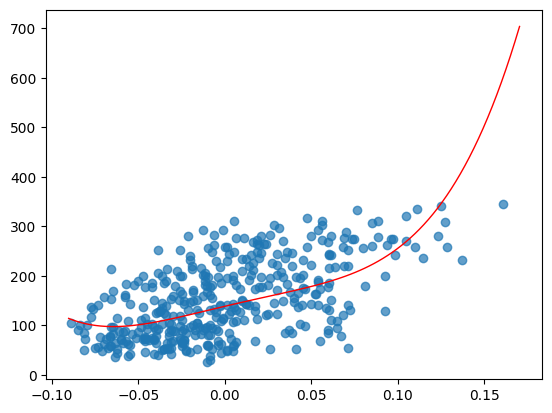

In [68]:
plt.scatter(x_train,y_train,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

## Grau 5

### Dados de teste

Score: 0.09185111976367522


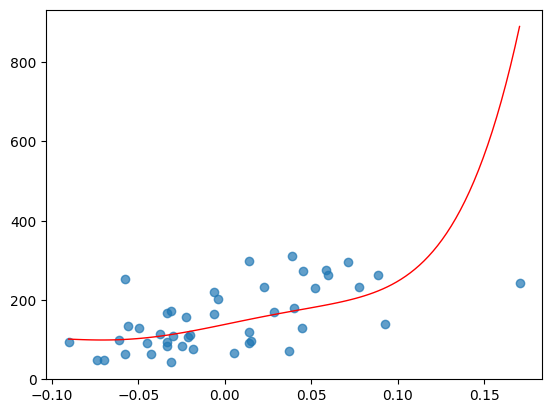

In [69]:
degree = 5
pol_regressor = make_pipeline(PolynomialFeatures(degree),
                              LinearRegression())
pol_regressor.fit(subset_diabetes_x[:100],diabetes_y[:100])
print("Score:",pol_regressor.score(subset_diabetes_x,diabetes_y))
min_x = subset_diabetes_x.min()
max_x = subset_diabetes_x.max()
x_range = np.linspace(min_x,max_x,100)
x_range = x_range.reshape(-1,1)
y_range = pol_regressor.predict(x_range)
plt.scatter(x_test,y_test,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)

### Dados de treino

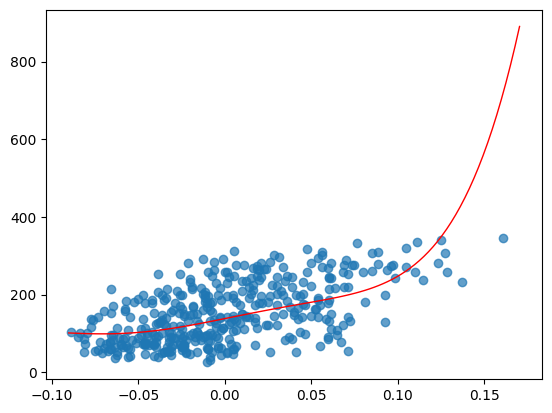

In [70]:
plt.scatter(x_train,y_train,alpha=0.7)
plt.plot(x_range,y_range,color="red",linewidth=1)